In [1]:
import sqlite3
from pathlib import Path

__file__ = %pwd
DATA = Path(__file__).parent / "data"
PRIORITIES = DATA / "Priorities"
DATABASE = DATA / "databases" / "exploration.db"
con = sqlite3.connect(DATABASE)
cur = con.cursor()

In [2]:
import pandas as pd
import numpy as np

# Load the data from the SQLite database by year
df_2016_17 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2016-17'", con)

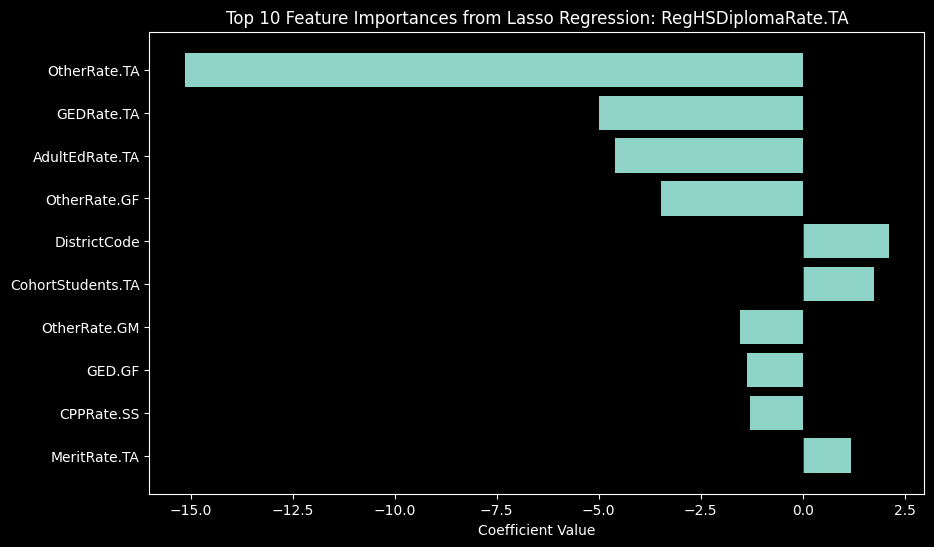

R^2 Score: 4.5633497900432474e-05
Mean Squared Error: 740.2641631142524
Root Mean Squared Error: 27.20779599883556


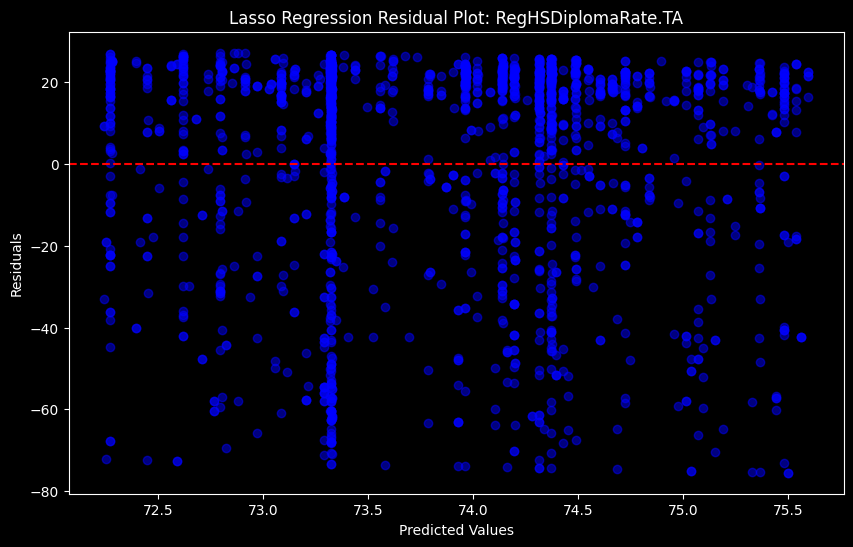

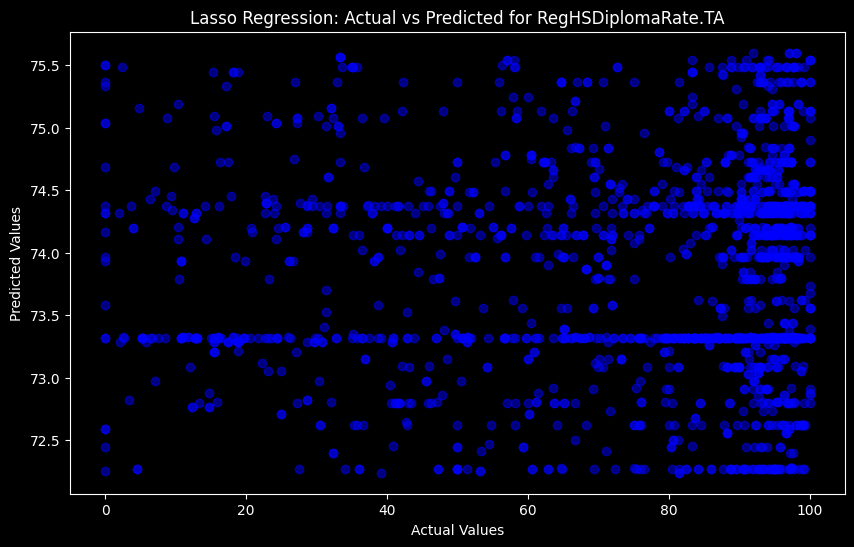

In [3]:
import utils.lasso as lasso_utils

target_column = "RegHSDiplomaRate.TA"

# Drop all columns that begin with "UniReqs" and "RegHSDiploma" and "DropoutRate"
columns_to_drop = [col for col in df_2016_17.columns if col.startswith("UniReqs") or col.startswith("RegHSDiploma") or col.startswith("Dropout")]
X_numeric, y, sorted_pairs = lasso_utils.fit_lasso_model(
    df_2016_17, target_column, columns_to_drop
)
lasso_utils.plot_lasso_coefficients(target_column, sorted_pairs)
lasso_model = lasso_utils.LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_results = lasso_utils.train_and_evaluate_lasso_model(X_numeric, y, lasso_model)
print(f"R^2 Score: {lasso_results['r2']}")
print(f"Mean Squared Error: {lasso_results['mse']}")
print(f"Root Mean Squared Error: {lasso_results['rmse']}")
lasso_utils.plot_lasso_residuals(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)
lasso_utils.plot_actual_predicted_lasso(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

### CSU/UC Graduation Rate

c:\School\STATS 170A\DS-Capstone-Project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782.0701236100867, tolerance: 720.0685897282217
  model = cd_fast.enet_coordinate_descent_gram(


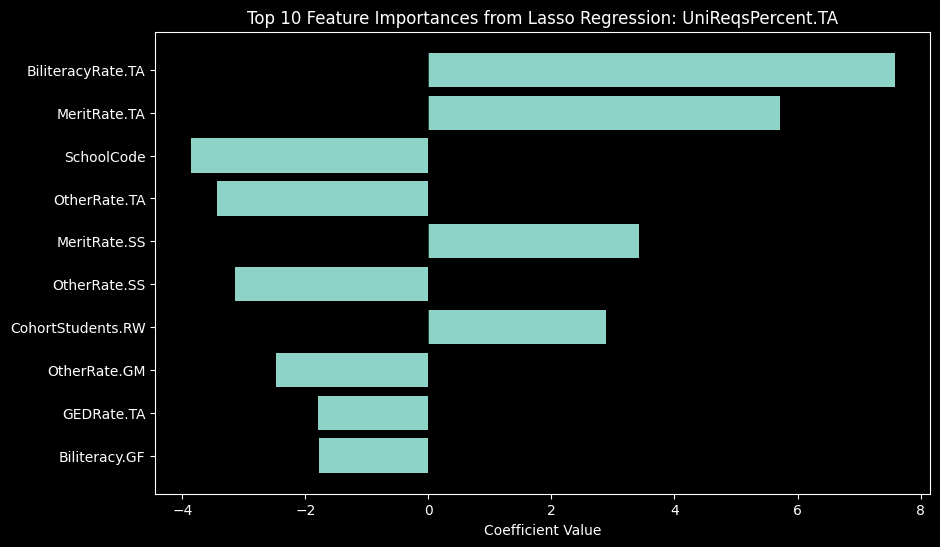

R^2 Score: -0.0005209766410085859
Mean Squared Error: 1012.1983509707381
Root Mean Squared Error: 31.815064843101265


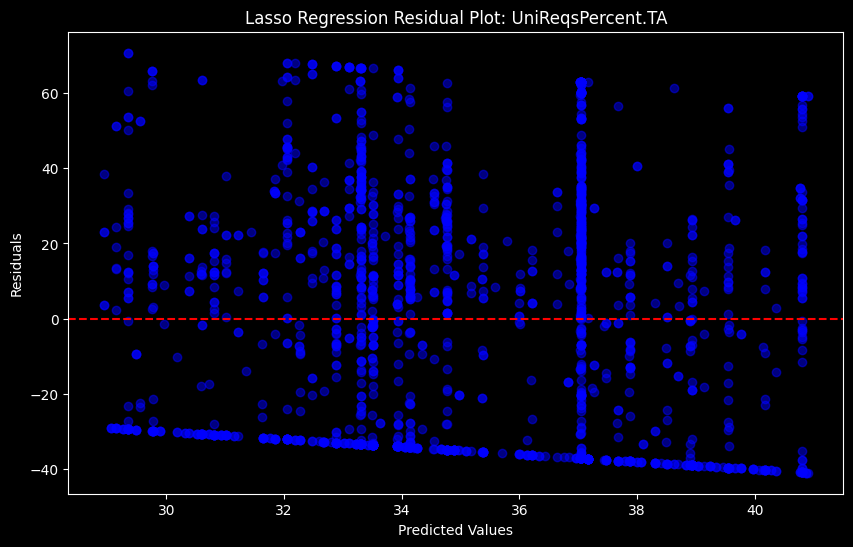

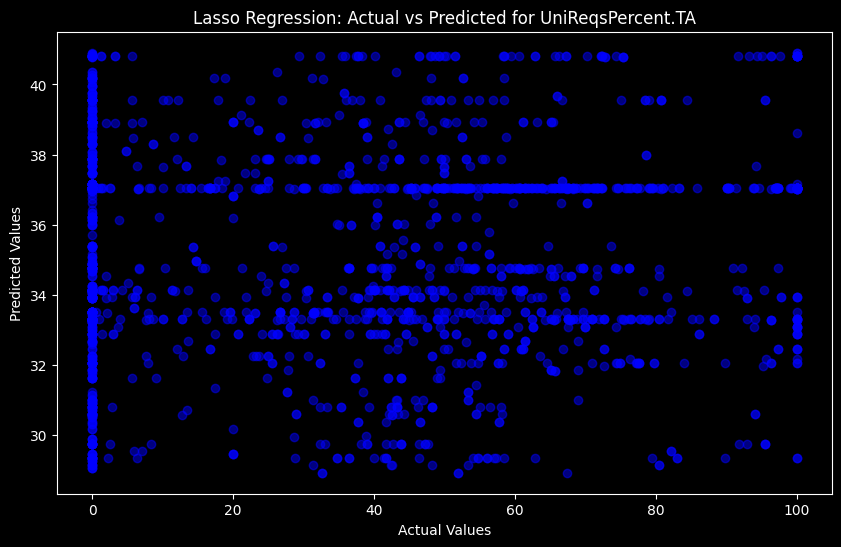

In [4]:
# Update the target column
target_column = "UniReqsPercent.TA"

# Fit the Lasso model for the new target column
X_numeric, y, sorted_pairs = lasso_utils.fit_lasso_model(
    df_2016_17, target_column, columns_to_drop
)

# Plot the Lasso coefficients
lasso_utils.plot_lasso_coefficients(target_column, sorted_pairs)
lasso_model = lasso_utils.LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_results = lasso_utils.train_and_evaluate_lasso_model(X_numeric, y, lasso_model)
print(f"R^2 Score: {lasso_results['r2']}")
print(f"Mean Squared Error: {lasso_results['mse']}")
print(f"Root Mean Squared Error: {lasso_results['rmse']}")

lasso_utils.plot_lasso_residuals(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)
lasso_utils.plot_actual_predicted_lasso(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

# XGBoost

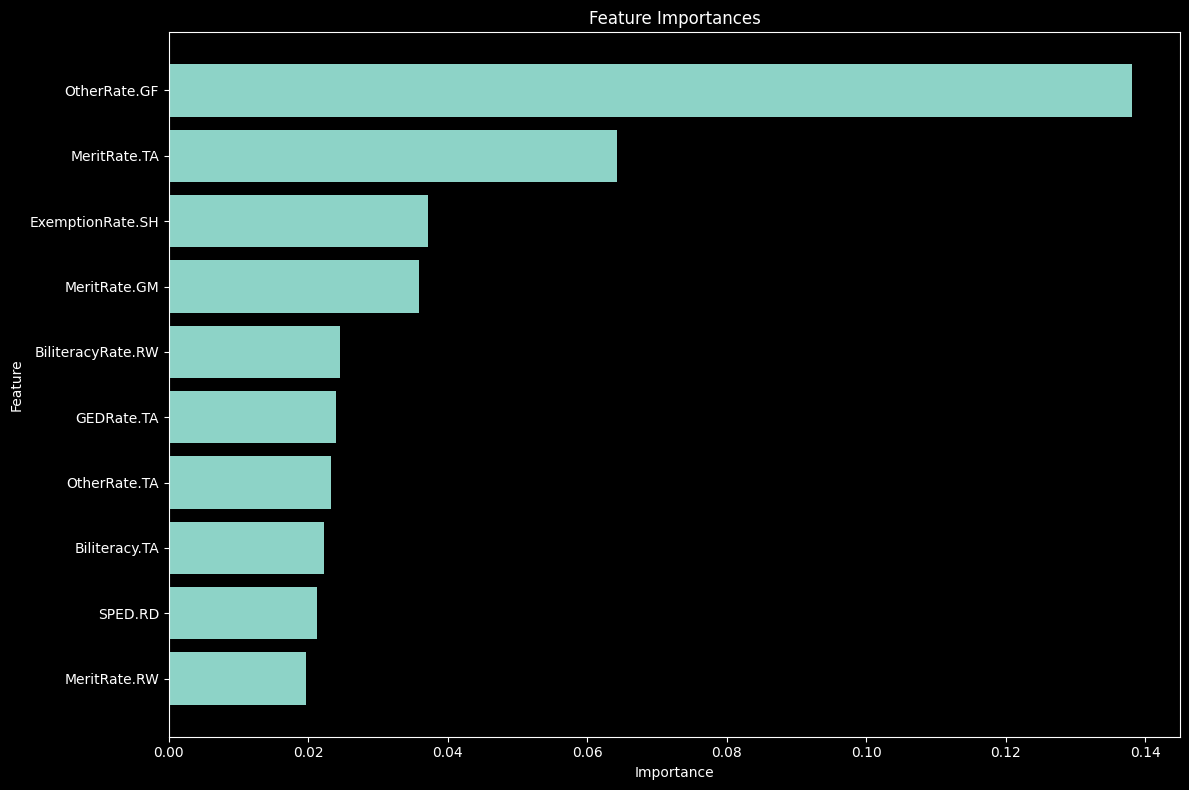

{'MSE': 61.299356403318036, 'RMSE': np.float64(7.829390551206271), 'MAE': 5.013142634073735, 'R^2': 0.9394078325880556}


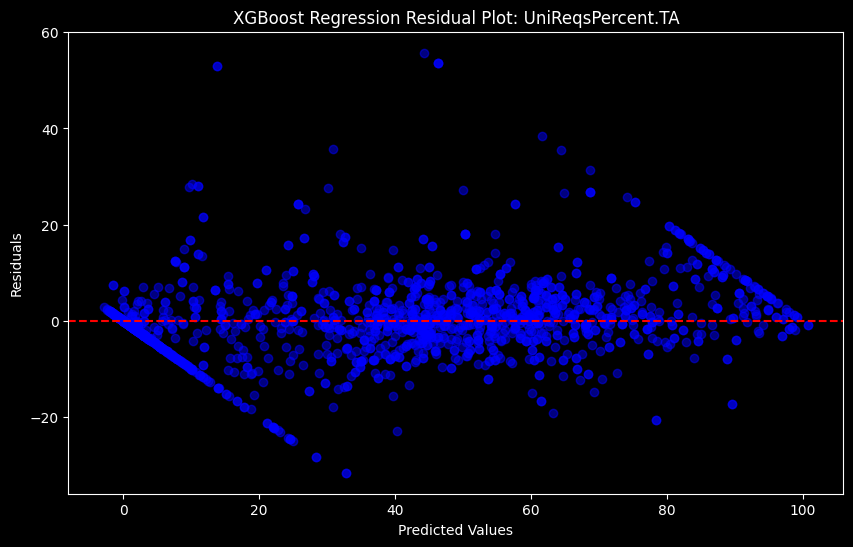

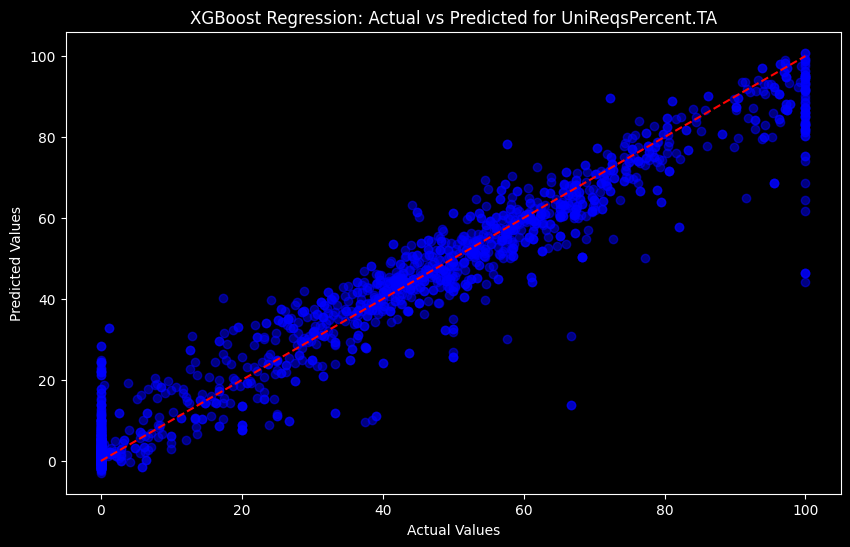

In [5]:
import utils.xgboost as xgb_utils

target_column = "UniReqsPercent.TA"
xgb_results = xgb_utils.train_xgboost_model(df_2016_17, target_column, columns_to_drop)
print(xgb_results["metrics"])
xgb_utils.plot_xgb_residuals(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)
xgb_utils.plot_xgb_predicted_actual(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)

## Graduation Rate

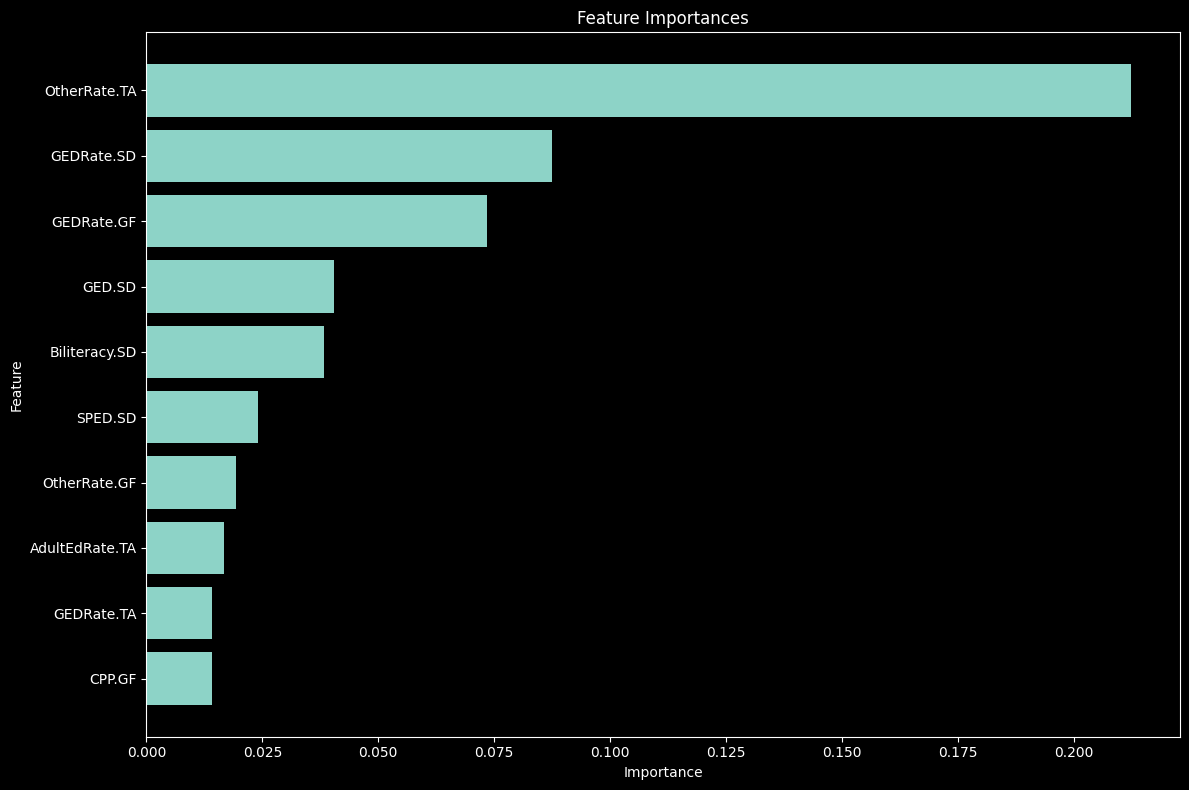

{'MSE': 14.851754974951787, 'RMSE': np.float64(3.853797474563471), 'MAE': 2.2349379017002207, 'R^2': 0.979938138333018}


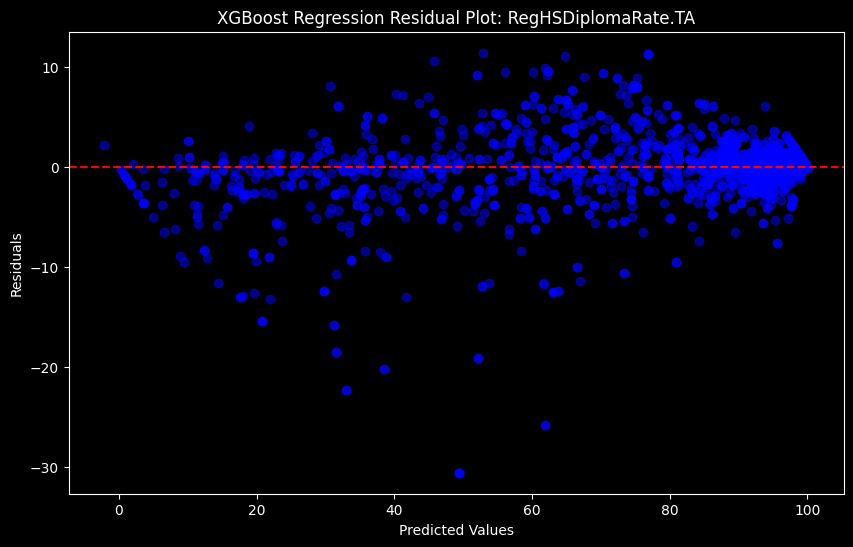

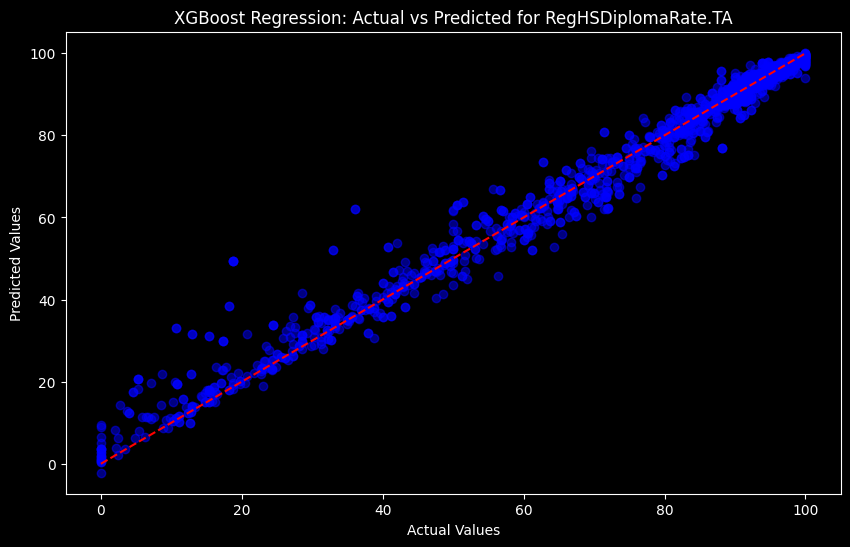

In [6]:
target_column = "RegHSDiplomaRate.TA"
xgb_results = xgb_utils.train_xgboost_model(df_2016_17, target_column, columns_to_drop)
print(xgb_results["metrics"])
xgb_utils.plot_xgb_residuals(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)
xgb_utils.plot_xgb_predicted_actual(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)